In [2]:
# We'll download the dataset into TF data input pipeline and then we will do some data cleaning and we will make our dataset ready for model 
# training.
# We'll download some essential modules here-
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
# Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the 
# TensorFlow library. TensorFlow is a free and open-source software library for machine learning and artificial intelligence.

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32 # You know, 32 is kind of like a standard batch size.
CHANNELS=3
EPOCHS=5

In [4]:
# Now we'll use Tensorflow's dataset to download the images into tf.data.dataset 
# Learn about TF dataset- https://www.youtube.com/watch?v=VFEOskzhhbc
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True, # So that it will just randomly shuffle the images and load them
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
) # This one call will load all the images into your Tensor basically, into your dataset.

Found 2152 files belonging to 3 classes.


In [5]:
# So, it loaded 2152 files belonging to 3 classes. Well, which 3 classes?
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
# These are the class names. Basically, your folder names are your class names.

In [7]:
len(dataset)

68

In [8]:
# Why is it just 68? Because, every element in the dataset is actually a batch of 32 images.

In [9]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# Let's just explore this dataset.
for image_batch, label_batch in dataset.take(1): # When you do this, it gives you 1 batch. 1 batch is 32 images.
    print(image_batch.shape)
    print(label_batch.numpy()) # Every element that you get is a tensor, so you need to convert that to numpy.
    

(32, 256, 256, 3)
[0 0 0 0 1 1 0 0 0 1 1 1 0 0 2 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0]


In [11]:
# (32, 256, 256, 3)- there are 32 images, each image is 256 by 256, and you have RGB channels.
# Potato__Early_blight is 0, Potato__Late_blight is 1, and Potato__healthy is 2
# If you want to print each individual image-
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(image_batch[0].numpy()) # This is a 3d array, every number is between 0 to 255. The color is represented with 0 to 255.
    # Machine learning models understand numbers. They don't understand images.

(256, 256, 3)
[[[157. 160. 177.]
  [156. 159. 176.]
  [155. 158. 175.]
  ...
  [196. 198. 210.]
  [199. 201. 213.]
  [201. 203. 215.]]

 [[156. 159. 176.]
  [155. 158. 175.]
  [154. 157. 174.]
  ...
  [192. 194. 206.]
  [195. 197. 209.]
  [196. 198. 210.]]

 [[154. 157. 174.]
  [154. 157. 174.]
  [152. 155. 172.]
  ...
  [187. 189. 201.]
  [189. 191. 203.]
  [190. 192. 204.]]

 ...

 [[130. 128. 139.]
  [123. 121. 132.]
  [116. 114. 125.]
  ...
  [138. 136. 147.]
  [190. 188. 199.]
  [168. 166. 177.]]

 [[124. 122. 133.]
  [120. 118. 129.]
  [114. 112. 123.]
  ...
  [153. 151. 162.]
  [164. 162. 173.]
  [177. 175. 186.]]

 [[122. 120. 131.]
  [123. 121. 132.]
  [122. 120. 131.]
  ...
  [144. 142. 153.]
  [165. 163. 174.]
  [134. 132. 143.]]]


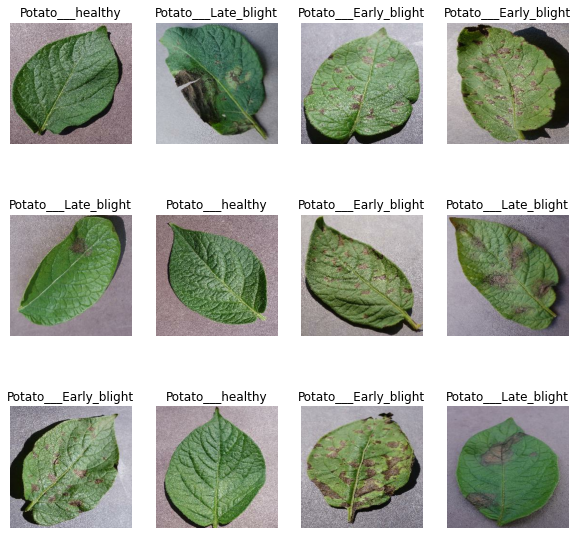

In [12]:
# Now, let's try to visualize these images. 
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    # Let's display a couple of these images
    for i in range(12):
        plt.subplot(3, 4, i+1) # A 3 by 4 matrix of images. After this, we specify the size of a plot so that the plots don't overlap
        # like how they currently are.
        # plt.imshow() expects 3d array.
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    # By the way, everytime it's shuffling, that's why you're seeing different image every time.

In [13]:
# Now we'll split our dataset into train and test.
# 80% ==> training
# 20% ==> 10% validation, 10% test (2 split)
# The validation set will be used during the training process. When you run each epoch, after each epoch, we do validation on the
# 10% of the dataset.
# An epoch in machine learning means one complete pass of the training dataset through the algorithm.
# Let us define epochs (EPOCHS=50), I'm going to run 50 epochs.This is trial and error, okay? It could be 20, 30, etc. We'll run
# let's say 50 epochs and at the end of every epoch, we use that validation dataset to do the validation. Once we're done through
# 50 epochs, once we have final model, then we use the 10% test data to measure the accuracy of our model. Before we deploy our
# model into the wild, we'll use this 10% test dataset to test the performance of our model.

In [14]:
# We don't have train_test_split() in TensorFlow. We're going to use dataset.take(). dataset.take(10) will take first 10 samples (10 batches actually).
train_size = 0.8 # 80%
len(dataset)*train_size # 80% of 68 

54.400000000000006

In [15]:
# So, I can now take first 54 samples, first 54 batches actually, each batch has 32, so it's much more simple.
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54) # We skip the first 54.
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset)*val_size # 10% of my actual dataset is 6

6.800000000000001

In [18]:
# So, we need 6 samples basically from our test dataset for our validation dataset.
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [20]:
# Now the code that we wrote was using all the hardcoded numbers. You want to wrap all of it into a nice looking python function:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size=10000): # all these 
    # are the default values.
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)# Before we split, the shuffling happens
        # What's seed?
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
# cacheing, pre-fetching, etc.
# Training dataset that we have, we'll first do cacheing
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # it will read the image from the disk, and then for the next iteration, when you need the same image, it will
# keep that image in the memory. So this improves the performance of your pipeline. shuffle(1000) will shuffle the images. And 
# then, prefetch, if you're using GPU and CPU, if GPU is busy training, prefetch will load the next set of batch from your disk
# and that will improve the performance. And here, I'm letting TensorFlow determine how many batches to load while GPU is training
# (parameter description I feel).
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# Now, my datasets are kind of optimized for training performance. So, my training will run fast.

In [23]:
# Now we need to do some pre-processing. If you all have worked on any image processing, you know the first thing that we do is
# scale. So, the image, the numpy array that we saw previously was between 0 to 255, you know it's an RGB scale. You want to
# divide that by 255 so that you get a number between 0 and 1 and the way you do that is by doing-
resize_and_rescale = tf.keras.Sequential([
    # Here, we supply our pre-processing pipeline
    layers.experimental.preprocessing.Rescaling(1.0/255), # We will supply this layer when we actually build our model.
    # We need to do one more thing, which is resizing. We'll resize every image to 256 by 256. Now you'll ask me, "our images are 
    # already 256 by 256, why do we need to resize them? This resize_and_rescale layer will eventually go to our ultimate model, 
    # and when we have a trained model and when it starts predicting, during prediction, if you're supplying any image which is not 
    # 256 by 256, this will take care of resizing it. So, that's esentially the idea here."
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE)
])

In [24]:
# Once we have created this layer, one more thing we're going to do in terms of preprocessing is use data augmentation to make
# our model robust.
# Let's say you train a model using some images and then when you try predicting, at that time if you're supplying an image which
# is rotated or which is different in contrast, then your model will not perform better. So, for that, we use a concept of data 
# augmentation.
# We'll do the same thing, we'll create a couple of layers.
data_augmentation = tf.keras.Sequential([
    # I'm going to apply a random flip and some rotation.
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    # So, that's my data augmentation layer.
])

In [25]:
# resize_and_rescale, data_augmentation, all these layers, I'm going to use ultimately in my actual model.
# Next, we'll be building a model and training it.
# (We have not completed pre-processing. We just created layers for pre-processing and we'll use these layers into our actual model.)

In [26]:
# We're going to build a Convolutional Neural Network and train that network on our train dataset and then we'll measure the
# accuracy using our test dataset. If the accuracy looks okay, we'll export that model to a file on a disk, so that it can be used
# later on in our FastAPI based server for making prediction. Let's get started:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS), # this is the format of our input
n_classes = 3

# Building our model-
model = models.Sequential([
    # We'll have set of layers here. # First layer would be resize_and_rescale. Whenever you feed an image, first thing will be that 
    # you'll resize it and then you'll scale it by dividing by 255.
    resize_and_rescale,
    # then you do data augmentation to generate new samples.
    data_augmentation,
    # The 3rd layers is your convolutional layer.
    layers.Conv2D(
        # number of filters
        32, # How did I come with 32? Well, this was trial and error. You need to have lot of layers where you can detect edges, 
        # the small features. 
        # The beauty of CNN is that it figures out what the filters are going to be for.
        (3, 3), # The actual filter size
        activation = "relu", # Then activation layer. The popular activation layer for hidden layers is always RelU, because 
        # it's very fast to compute.
        input_shape = input_shape # Input shape.
    ),
    # After convolutional layer, you generally have pooling. Preserving the features and reducing the size of the image. Which
    # can be very helpful computation wise.
    layers.MaxPooling2D((2, 2)),# Max pooling layer.
    # And then, we did some trial and error and they figured, "maybe I need to stack few max pooling and Conv2D layers."
    # The following is trial and error, you can remove couple of layers and figure it out. 
    layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    # Once we have stacked the Conv2D and max pooling layers, we need to now flatten whatever data we get.
    layers.Flatten(), # So, I'm going to flatten it here.
    layers.Dense(64, activation="relu"), # Dense layer of 64 neurons.
    # My last layer will have 3 neurons with softmax activation function.
    layers.Dense(n_classes, activation="softmax") # softmax activation function normalizes the probability of your classes. 
])

model.build((32, 256, 256, 3))

In [27]:
# Now our model architechture is ready, I'll just do a quick summary.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
# In deep learning, we always first define the neural network architechture, and we've done that. Then we do compile:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"] # In each epoch, what type of metric will you use to track the gradient descent basically? So, accuracy
    # is the metric that we use to kind of track your training process.
)

In [29]:
# Finally, this is the 3rd step-
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE, 
    verbose=1, # I'll just do verbose 1 so that it just prints lot of output and we can see what's going on.
    validation_data=val_ds # This validation will be used during each epoch, it can help you track the accuracy.
)
# We'll record all the history of every epochs in the history parameter so that we can chart some plots later on.

Epoch 1/5
54/54 [==============================] - 769s 14s/step - loss: 0.9107 - accuracy: 0.4850 - val_loss: 0.8649 - val_accuracy: 0.5156
Epoch 2/5
54/54 [==============================] - 118s 2s/step - loss: 0.6907 - accuracy: 0.6806 - val_loss: 0.5114 - val_accuracy: 0.7708
Epoch 3/5
54/54 [==============================] - 140s 3s/step - loss: 0.4921 - accuracy: 0.7917 - val_loss: 0.3454 - val_accuracy: 0.8750
Epoch 4/5
54/54 [==============================] - 141s 3s/step - loss: 0.3501 - accuracy: 0.8594 - val_loss: 0.4053 - val_accuracy: 0.8385
Epoch 5/5
54/54 [==============================] - 217s 4s/step - loss: 0.3806 - accuracy: 0.8455 - val_loss: 0.3939 - val_accuracy: 0.8906


In [30]:
# In the first epoch, the accuracy that you got on your training dataset is 56.42%. But the accuracy on validation dataset was
# 71%. It will first train your model on training dataset, it will measure the accuracy, and then runs a little test using the 
# validation data and it gets 71% accuracy.
# As we have more epochs, the accuracy keeps on improving.

# Before you deploy any model, you want to run a test. You want to figure out how well your model is performing by trying it out
# on a test dataset so that it's not biased.
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 444ms/step - loss: 0.4468 - accuracy: 0.8594


In [31]:
# Now we'll play with the history parameter.
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
# For every key, there are 5 values becuase we ran 5 epochs.
history.history["accuracy"]

[0.48495370149612427,
 0.6805555820465088,
 0.7916666865348816,
 0.859375,
 0.8454861044883728]

In [34]:
# We can plot these numbers in a nice matplotlib chart.

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

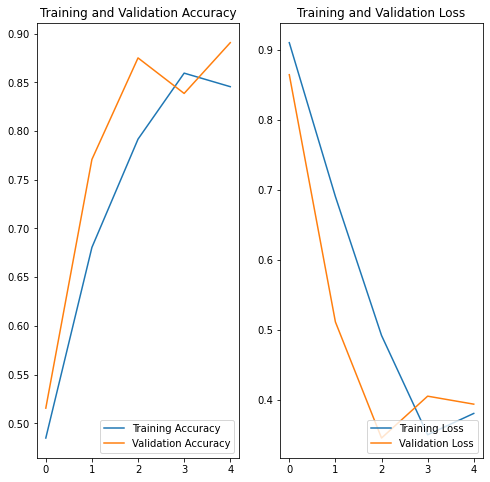

In [35]:
# Plotting training and validation accuracy. 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1) # https://www.w3schools.com/python/matplotlib_subplot.asp
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# loss is basically an error, an error in back propagation, keeps on reducing as you proceed forward in your epochs.
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")

First image to predict: 
Actual label:  Potato___Early_blight
1/1 [==============================] - 1s 897ms/step
Predicted label:  Potato___Early_blight


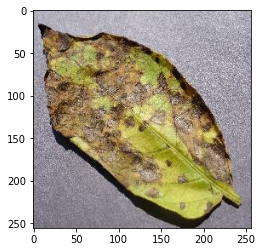

In [36]:
# Now I want to make a prediction.
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    # print(images_batch[0].numpy().astype("uint8")) # It's a 3d array, r, g, b
    # plt.imshow(images_batch[0].numpy().astype("uint8"))
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("First image to predict: ")
    plt.imshow(first_image)
    print("Actual label: ", class_names[first_label])
    
    batch_predictions = model.predict(images_batch)
    print("Predicted label: ", class_names[np.argmax(batch_predictions[0])]) # Why is it having 3 values? Well, because, in our model architechture, we have 3 neurons and 
    # activation is softmax. softmax is just a probability. There are like 3 probabilities. And whatever is the highest
    # probability, that is the class.

In [37]:
def predict(model, images):
    images_predictions = model.predict(images)
    Images_predictions = [None] * 32
    confidence = [None] * 32
    for i in range(32):
        Images_predictions[i] = class_names[np.argmax(images_predictions[i])]
        confidence[i] = round(100 * (np.max(images_predictions[i])), 2)
    return Images_predictions, confidence
    

In [38]:
for images, labels in test_ds.take(1):
    batch_predictions, confidence = predict(model, images)
    for i in range(32):
        print("Actual label is ", class_names[labels[i].numpy()])
        print("Predicted label is ", batch_predictions[i])

1/1 [==============================] - 0s 368ms/step
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___Early_blight
Predicted label is  Potato___Early_blight
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___Early_blight
Predicted label is  Potato___Early_blight
Actual label is  Potato___Early_blight
Predicted label is  Potato___Early_blight
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___Early_blight
Predicted label is  Potato___Early_blight
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___Late_blight
Predicted label is  Potato___Late_blight
Actual label is  Potato___healthy
Predicted label is  Potato___Late_bl

1/1 [==============================] - 0s 327ms/step


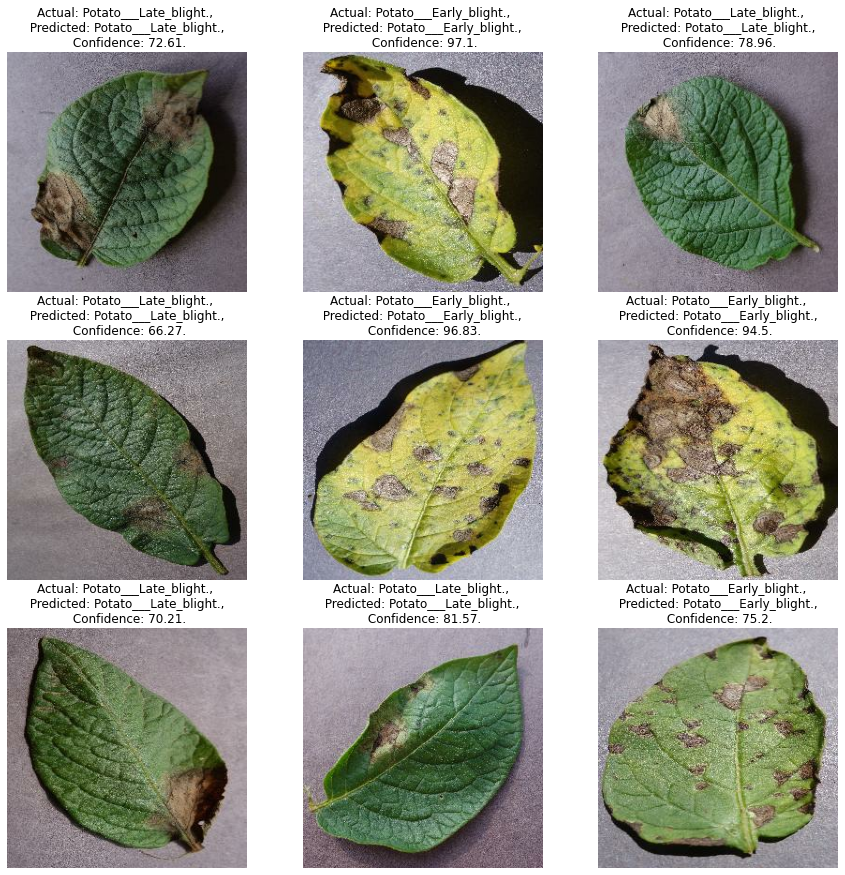

In [39]:
plt.figure(figsize=(15, 15))
predicted_classes = [None] * 32
for images, labels in test_ds.take(1):
    predicted_classes, confidence = predict(model, images)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Actual: {class_names[labels[i].numpy()]}., \n Predicted: {predicted_classes[i]}., \n Confidence: {confidence[i]}.")

In [40]:
# Now I'd like to save the model. Let's create a new directory called models and we'll save our model there. Let's save it by 
# our model version:
model_version = 1
model.save(f"../models/{model_version}")
# You'l now be able to import this one directory.

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [41]:
# How to auto increment your models' version number?
import os
model_version = max([int(i) for i in os.listdir("../models")])+1
model_version

2